# sChemNET: A deep learning framework for predicting small molecules targeting miRNAs

Galeano et al. Copyrights 2023.

We import basic libraries we will need

In [1]:
import sys, os
import pandas as pd
import numpy as np
from importlib import reload
import pickle
from collections import defaultdict

Get current directory and add folder /source/ to path

In [2]:
mydir = os.getcwd()
sys.path.insert(0, mydir + '/source/')

Import our own libraries

In [3]:
import readDatasets as rd
import dataProcessing as dp
import NNmodels as md
import metrics as me
import summaryplots as mplt
import competitors as comp
import evaluations as ev

#### Step 1: Load SM2miR and chemical features

In [4]:
species_chosen = ['Homo sapiens', 'Mus musculus', 'Rattus norvegicus']
df_SM2miR, df_chemical_SM2miR, df_chemical_repoHub = rd.read_datasets(mydir)
Y, X, df_Y, XrepoHub = rd.get_matrices(df_SM2miR, df_chemical_SM2miR, species_chosen[0], 'MACCS', df_chemical_repoHub)

Number of small molecules 212


#### Step 2: Filter the data to ensure we have 5 associations per miRNA

SMxmiRNAs =  (131, 126) SMxchemFeat = (131, 167) min per SM = 1 min per miRNA = 5


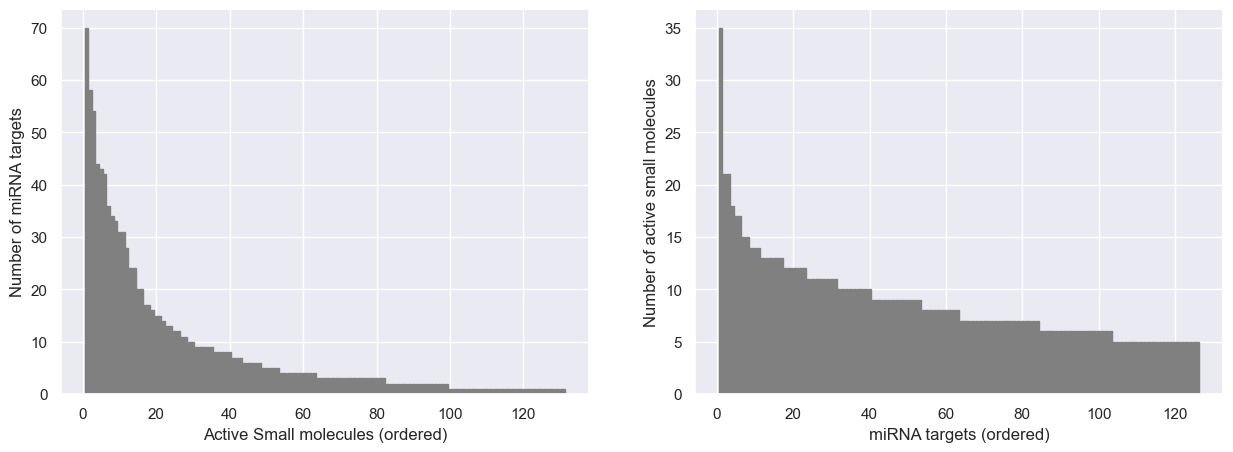

In [5]:
Y_filtered, X_filtered, df_YFiltered, X_repoHubFiltered = rd.filter_data(X, Y, df_Y, XrepoHub, plotornot = True)

#### Step 3: We augment our dataset by combining labelled and unlabelled chemical structures

In [6]:
X_aug, Y_aug, CID_aug = dp.data_augmentation_non_replicated_repoHub(X_filtered.copy(), Y_filtered.copy(), X_repoHubFiltered.copy(), list(df_YFiltered.index), list(df_chemical_repoHub['CID']))

(6433, 167) (6433, 126) 114


#### Step 4: Calculate sequence similarities

In [7]:
miRNAs = list(df_YFiltered.columns)
SeqSIM = dp.get_sequence_similarities(miRNAs, mydir)

Algorithm = Needleman-Wunsch


#### Step 4: Read optimal hyperparameters for sChemNET when using sequence information

In [8]:
sChemNET_hyperparameters = rd.read_result(mydir, 'best_modelZseqSIM_homosapiens')

#### Step 5: Run sChemNET on a selected miRNA to generate predictions
The code runs for 20 repetitions and computes the average score obtained for each small molecule on those repetitions

In [36]:
miRNA_assession_number = 'MIMAT0000070'
index = np.where(df_YFiltered.columns == miRNA_assession_number)[0][0]

In [38]:
reload(ev)
predictions = ev.generate_predictions(X_aug.copy(), Y_aug.copy(),
                        df_YFiltered.columns, # column names miRNAs
                        CID_aug.copy(), # row names CIDs of small molecules
                        index,
                        sChemNET_hyperparameters, SeqSIM)

  0%|                                                                                        | 0/20 [00:00<?, ?it/s]

125/125 [==============================] - 0s 613us/step


  5%|████                                                                            | 1/20 [00:02<00:40,  2.15s/it]

125/125 [==============================] - 0s 633us/step


 10%|████████                                                                        | 2/20 [00:04<00:35,  1.98s/it]

125/125 [==============================] - 0s 573us/step


 15%|████████████                                                                    | 3/20 [00:05<00:33,  1.95s/it]

125/125 [==============================] - 0s 597us/step


 20%|████████████████                                                                | 4/20 [00:07<00:30,  1.92s/it]

125/125 [==============================] - 0s 577us/step


 25%|████████████████████                                                            | 5/20 [00:09<00:28,  1.91s/it]

125/125 [==============================] - 0s 585us/step


 30%|████████████████████████                                                        | 6/20 [00:11<00:26,  1.90s/it]

125/125 [==============================] - 0s 581us/step


 35%|████████████████████████████                                                    | 7/20 [00:13<00:24,  1.88s/it]

125/125 [==============================] - 0s 573us/step


 40%|████████████████████████████████                                                | 8/20 [00:15<00:22,  1.86s/it]

125/125 [==============================] - 0s 573us/step


 45%|████████████████████████████████████                                            | 9/20 [00:17<00:20,  1.85s/it]

125/125 [==============================] - 0s 561us/step


 50%|███████████████████████████████████████▌                                       | 10/20 [00:18<00:18,  1.84s/it]

125/125 [==============================] - 0s 605us/step


 55%|███████████████████████████████████████████▍                                   | 11/20 [00:20<00:16,  1.83s/it]

125/125 [==============================] - 0s 565us/step


 60%|███████████████████████████████████████████████▍                               | 12/20 [00:22<00:14,  1.81s/it]

125/125 [==============================] - 0s 569us/step


 65%|███████████████████████████████████████████████████▎                           | 13/20 [00:24<00:13,  1.90s/it]

125/125 [==============================] - 0s 557us/step


 70%|███████████████████████████████████████████████████████▎                       | 14/20 [00:26<00:11,  1.87s/it]

125/125 [==============================] - 0s 601us/step


 75%|███████████████████████████████████████████████████████████▎                   | 15/20 [00:28<00:09,  1.85s/it]

125/125 [==============================] - 0s 565us/step


 80%|███████████████████████████████████████████████████████████████▏               | 16/20 [00:29<00:07,  1.82s/it]

125/125 [==============================] - 0s 609us/step


 85%|███████████████████████████████████████████████████████████████████▏           | 17/20 [00:31<00:05,  1.81s/it]

125/125 [==============================] - 0s 573us/step


 90%|███████████████████████████████████████████████████████████████████████        | 18/20 [00:33<00:03,  1.79s/it]

125/125 [==============================] - 0s 577us/step


 95%|███████████████████████████████████████████████████████████████████████████    | 19/20 [00:35<00:01,  1.78s/it]

125/125 [==============================] - 0s 605us/step


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:37<00:00,  1.85s/it]


##### Step 6: We combine the results with additional data from the drug repurposing hub
In the dataframe below all predictions are shown but they can be filtered by percentile score 

In [44]:
allpredictions_repoHub = predictions_repoHub = ev.combine_predictions_withdrugRepoHub_dataset(mydir, predictions)

In [45]:
predictions98perc_repoHub = allpredictions_repoHub[allpredictions_repoHub['percentile score'] > 98]

In [46]:
predictions98perc_repoHub

,miRNA,CID,sChemNET score,percentile score,pert_iname,clinical_phase,moa,target,disease_area,indication
0,MIMAT0000070,168049.0,0.313649,100.000000,C11-Acetate,Phase 3,NaN,ABAT|ACE|AKR1C3|CA2|CELA1|ESR2|FFAR2|FFAR3|HPR...,NaN,NaN
1,MIMAT0000070,86820626.0,0.271605,99.984424,cisplatin,Launched,DNA alkylating agent|DNA synthesis inhibitor,XIAP,oncology,testicular carcinoma|ovarian cancer|bladder ca...
2,MIMAT0000070,515328.0,0.258237,99.953271,fdcyd,Phase 2,DNA methyltransferase inhibitor,NaN,NaN,NaN
3,MIMAT0000070,9386.0,0.256512,99.937695,perfluorodecalin,Launched,NaN,NaN,dermatology,cosmetic
4,MIMAT0000070,1174.0,0.250839,99.922118,uracil,Launched,NaN,DPYD|UCKL1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
113,MIMAT0000070,1990.0,0.074404,98.068536,acetohydroxamic-acid,Launched,urease inhibitor,MMP12,infectious disease,urinary tract infections
114,MIMAT0000070,31307.0,0.074157,98.052960,triamcinolone,Launched,glucocorticoid receptor agonist,NR3C1,dermatology,corticosteroid-responsive dermatoses
115,MIMAT0000070,5443.0,0.074105,98.037383,o-mercapto-benzoic-acid,Preclinical,NaN,NaN,NaN,NaN
116,MIMAT0000070,68406.0,0.073977,98.021807,1-octacosanol,Phase 2,NaN,NaN,NaN,NaN
